# A cantera simulation through RMG-Py

In [1]:
from rmgpy.chemkin import *
from rmgpy.tools.canteraModel import *
from rmgpy.quantity import *
from IPython.display import display, Image

In [2]:
# Load chemkin file
speciesList, reactionList = loadChemkinFile('mech/chem_annotated.inp','mech/species_dictionary.txt')

In [3]:
# Set conditions
ethane = filter(lambda x: x.molecule[0].toSMILES() == 'CC', speciesList)[0]
argon = filter(lambda x: x.molecule[0].toSMILES() == '[Ar]', speciesList)[0]

molFracList=[{ethane: 1}]
Tlist = Quantity([1300,1500,2000],'K')
Plist = Quantity([1],'atm')
reactionTime = Quantity(0.5, 'ms')

In [4]:
# Create cantera object, simulate, and plot
job = Cantera(speciesList=speciesList, reactionList=reactionList)
job.loadChemkinModel('mech/chem_annotated.inp')
job.generateConditions('IdealGasReactor', reactionTime, molFracList, Tlist, Plist)
alldata = job.simulate()
job.plot(alldata)

Converting chem.inp to chem.cti...
Wrote CTI mechanism file to '/home/connie/Research/Code/rmg_wiki/tools/cantera/chem.cti'.
Mechanism contains 19 species and 37 reactions.
Saving into Cantera Model...


Condition 1


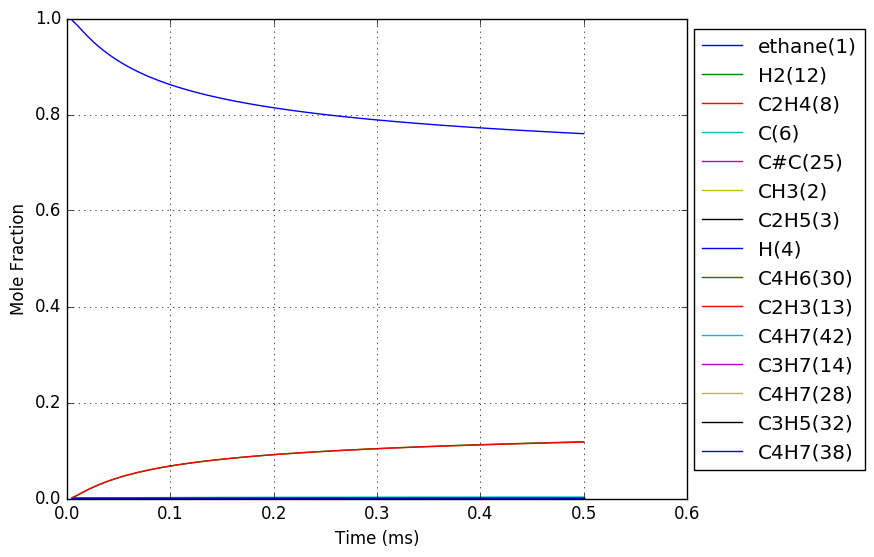

Condition 2


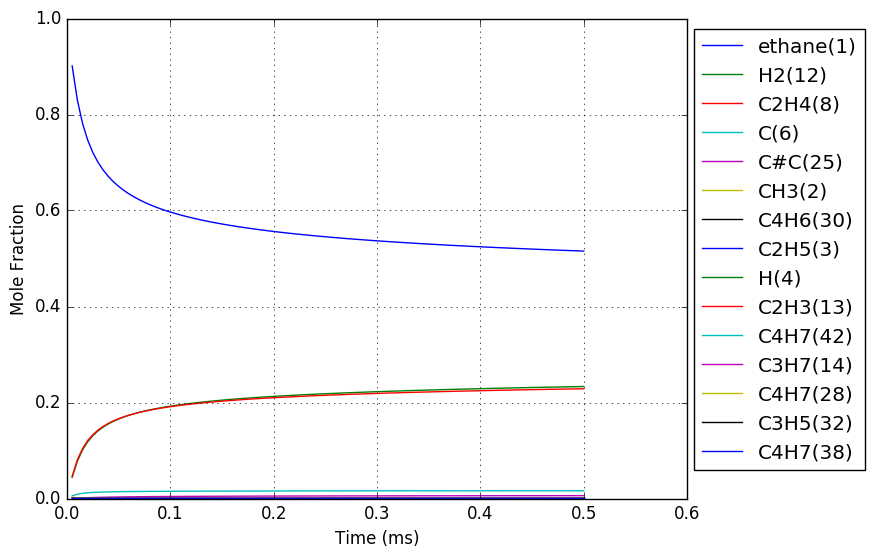

Condition 3


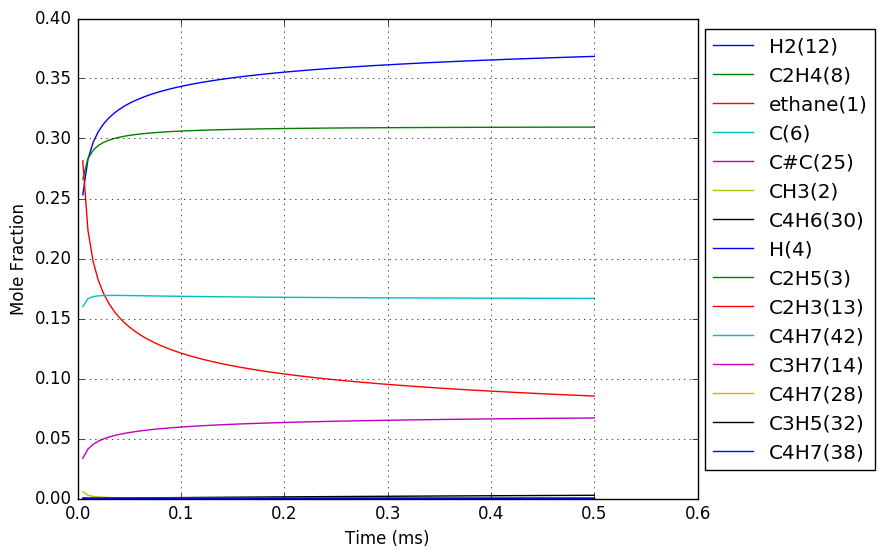

In [5]:
# Show the plots in the ipython notebook
for i, condition in enumerate(job.conditions):
    print 'Condition {0}'.format(i+1)
    display(Image(filename="{0}_mole_fractions.png".format(i+1)))